<a href="https://colab.research.google.com/github/jiyeon712/Diabetes-Prediction/blob/main/%EB%8B%B9%EB%87%A8%EC%98%88%EC%B8%A1_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(16)

- dense 를 호출한다는 뜻은 은닉노드를 꽉 채운다는 말

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# outcome 예측
filename = '/content/drive/MyDrive/기계학습/diabetes.csv'
df = pd.read_csv(filename)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


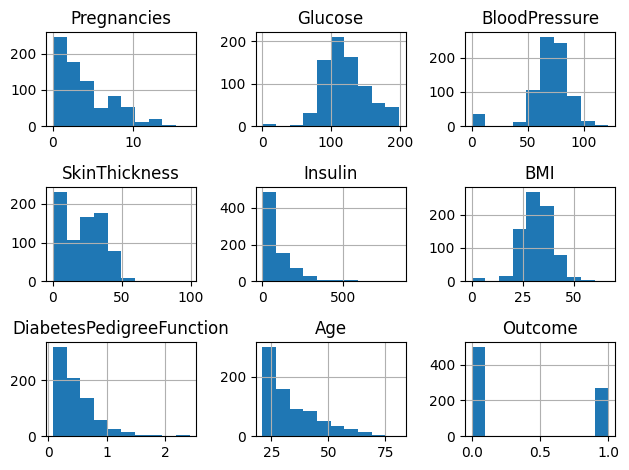

In [ ]:
### 히스토그램
# ---> 히스토그램을 살펴보는 이유 : 정규분포인지 아닌지 파악.
df.hist()
plt.tight_layout()
plt.show()

In [ ]:
# 널값이 있나 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 이상한 점 : bmi나 인슐린 등 0이 나올 수가 없는데 최솟값이 0이 나옴.
# -----> 히스토그램을 다시 보니 널값이 없는 대신 값이 없는 데이터를 0으로 채워넣은 데이터셋이었음.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [ ]:
def preprocess(df):
    print('----------------------------------------------')
    print("Before preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # 0이 아닌 값의 평균을 계산해 0 값을 대체
    df['Glucose'] = df['Glucose'].replace(0, np.nan)      # 값이 0인 걸 널값으로 대체해라.
    df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
    df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
    df['Insulin'] = df['Insulin'].replace(0, np.nan)
    df['BMI'] = df['BMI'].replace(0, np.nan)
    df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())     # 값이 0인걸 평균값으로 대체해라.
    df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
    df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
    df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
    df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

    print('----------------------------------------------')
    print("After preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ": " + str(missing_rows))
    print('----------------------------------------------')

    # 데이터 표준화
    df_scaled = preprocessing.scale(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    df_scaled['Outcome'] = df['Outcome'] # outcome 은 스케일링 안된 오리지널 값으로 다시 바꿔줌.
    df = df_scaled


    return df


In [ ]:
### 데이터 전처리 및 특징 공학 수행
df = preprocess(df)
df

----------------------------------------------
Before preprocessing
Number of rows with 0 values for each variable
Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------
----------------------------------------------
After preprocessing
Number of rows with 0 values for each variable
Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-1.440981e-18,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-1.440981e-18,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,1.313379e-17,-1.440981e-18,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-1.440981e-18,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,1.313379e-17,-1.440981e-18,-0.343120,-0.371101,1.170732,1


In [ ]:
### 데이터를 훈련 데이터셋과 테스트 데이터셋으로 분할
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=8))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50,batch_size=20)

Epoch 1/50
27/27 [==============================] - 3s 6ms/step - loss: 0.6829 - accuracy: 0.6443
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.6555
Epoch 3/50
27/27 [==============================] - 0s 6ms/step - loss: 0.5695 - accuracy: 0.7076
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7225
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.7374
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: 0.5139 - accuracy: 0.7412
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.7505
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7467
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.7486
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7505
Epoch 11/50
27/27 [

In [ ]:
### 결과 - 정확도

scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

AttributeError: ignored

In [ ]:
model1 = Sequential()
model1.add(Dense(32,activation='relu',input_dim=8))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model1.fit(X_train,y_train,epochs=50,batch_size=20)



Epoch 1/50
27/27 [==============================] - 1s 3ms/step - loss: 0.7082 - accuracy: 0.5047
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.7095
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7449
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.7598
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7728
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.7672
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.7672
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.7765
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7840
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.7821
Epoch 11/50
27/27 [

In [ ]:
### 테스트 데이터의 예측값 출력

model1.predict(X_test)

8/8 [==============================] - 0s 9ms/step


array([[0.6803328 ],
       [0.0704232 ],
       [0.00262768],
       [0.37983897],
       [0.0350036 ],
       [0.8092973 ],
       [0.29929706],
       [0.03515857],
       [0.08570796],
       [0.06015074],
       [0.07484788],
       [0.45610884],
       [0.81326264],
       [0.7293039 ],
       [0.19402075],
       [0.41211542],
       [0.7888408 ],
       [0.0555342 ],
       [0.05687808],
       [0.17259605],
       [0.01071404],
       [0.61490726],
       [0.2682512 ],
       [0.03186611],
       [0.13615088],
       [0.00732218],
       [0.886183  ],
       [0.01513627],
       [0.05533525],
       [0.09352589],
       [0.02981054],
       [0.23845181],
       [0.18810731],
       [0.01599831],
       [0.38924947],
       [0.03522166],
       [0.01527293],
       [0.8982591 ],
       [0.4163713 ],
       [0.1005386 ],
       [0.47935122],
       [0.61365014],
       [0.09622081],
       [0.46666104],
       [0.01296337],
       [0.27151492],
       [0.37189165],
       [0.189

In [ ]:
### 결과 - 정확도
scores1 = model1.evaluate(X_train, y_train)
scores2 = model1.evaluate(X_test, y_test)
print(scores1)
print(scores2)

# 노드 수 늘려도 성능은 비슷함.

8/8 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.7922
[0.385471910238266, 0.8212290406227112]
[0.4151898920536041, 0.7922077775001526]


In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


MODEL_DIR = './model/'    # model이라는 디렉토리 생성
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=20, verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 1: val_loss improved from inf to 0.42172, saving model to ./model/01-0.4217.hdf5

Epoch 2: val_loss did not improve from 0.42172


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 0.42172

Epoch 4: val_loss improved from 0.42172 to 0.42148, saving model to ./model/04-0.4215.hdf5

Epoch 5: val_loss did not improve from 0.42148

Epoch 6: val_loss did not improve from 0.42148

Epoch 7: val_loss did not improve from 0.42148


In [ ]:
### 결과 - 정확도 train/test 모두 출력

scores1 = model.evaluate(X_train, y_train)
scores2 = model.evaluate(X_test, y_test)
print(scores1)
print(scores2)

# patience 를 너무 작게 줘서 성능이 좋아지지않음. --> patience 얼마나 줘야하는지 잘 지정해야함.

8/8 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7879
[0.41056981682777405, 0.8081936836242676]
[0.422454833984375, 0.7878788113594055]


8/8 [==============================] - 0s 2ms/step


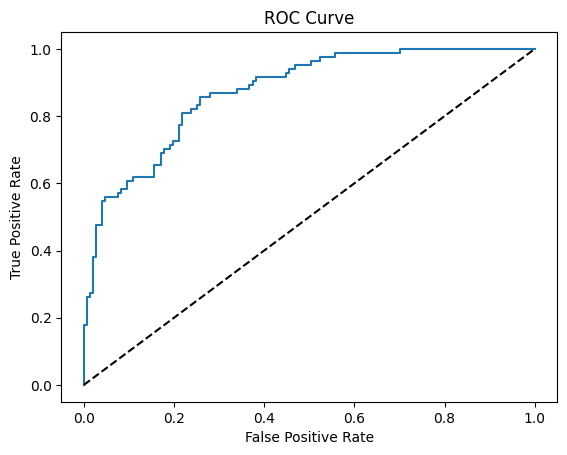

<Figure size 640x480 with 0 Axes>

In [ ]:
# 결과 - ROC 곡선
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

In [ ]:
###저장된 모델 로드

new = load_model('/content/model/01-0.4223.hdf5')

In [ ]:
###로드한 모델 사용

new.predict(X_test)

8/8 [==============================] - 0s 4ms/step


array([[0.6166527 ],
       [0.17754774],
       [0.0084729 ],
       [0.5771643 ],
       [0.05714655],
       [0.79301006],
       [0.13387689],
       [0.03636336],
       [0.14676881],
       [0.05714159],
       [0.23100534],
       [0.34279642],
       [0.83759886],
       [0.8847093 ],
       [0.46419296],
       [0.38114887],
       [0.7688384 ],
       [0.04422865],
       [0.04882998],
       [0.26416695],
       [0.00362661],
       [0.42427143],
       [0.5294869 ],
       [0.04895244],
       [0.11644252],
       [0.01213445],
       [0.94252294],
       [0.05482586],
       [0.02141094],
       [0.0570726 ],
       [0.05781031],
       [0.19246027],
       [0.33006954],
       [0.05716229],
       [0.46826413],
       [0.02486926],
       [0.10960402],
       [0.83744687],
       [0.45060027],
       [0.05759279],
       [0.3983997 ],
       [0.7577275 ],
       [0.17005372],
       [0.5459511 ],
       [0.01993014],
       [0.1030091 ],
       [0.48628926],
       [0.131

In [ ]:
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#SVM

model_svm = svm.SVC(gamma='scale')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

score = metrics.accuracy_score(y_pred,y_test)
print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))


SVM: 77.06


In [ ]:
#DecisionTree

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

y_pred = model_DT.predict(X_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))


DecisionTreeClassifier: 71.86


In [ ]:
#Random Forest

model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)

y_pred = model_RF.predict(X_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))


RandomForestClassifier: 74.03


In [ ]:
features = pd.Series(
    model_RF.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(features)

Glucose                     0.237830
BMI                         0.177374
DiabetesPedigreeFunction    0.134636
Age                         0.116939
Insulin                     0.092903
BloodPressure               0.084727
SkinThickness               0.084470
Pregnancies                 0.071121
dtype: float64
